<a href="https://colab.research.google.com/github/upcomingowner2023/Python-learnings/blob/main/Logistic_Regression(Telecom_churn_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Telecom churn**:<br> 
You have a telecom firm which has collected data of all its customers. The main types of attributes are:

1. Demographics (age, gender etc.)
2. Services availed (internet packs purchased, special offers taken, etc.)
3. Expenses (amount of recharge done per month etc.)

Based on all this past information, you want to build a model which will predict whether a particular customer will churn or not, i.e. whether they will switch to a different service provider or not. So the variable of interest, i.e. the target variable here is ‘Churn’ which will tell us whether or not a particular customer has churned. It is a binary variable: 1 means that the customer has churned and 0 means the customer has not churned.
 

In [57]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm


**Step1: Read and understanding the data**

In [2]:
churn_data=pd.read_csv("/content/churn_data.csv")
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_data=pd.read_csv("/content/customer_data.csv")
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_data=pd.read_csv("/content/internet_data.csv")
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
# merge churn_data and customer_data based on customer_id
df=pd.merge(churn_data,customer_data, how="inner", on="customerID")

In [6]:
# final data frames with predicted values
telecom=pd.merge(df,internet_data, how="inner", on="customerID")

**Step 2: Inspecting the data**

In [7]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [8]:
telecom.shape

(7043, 21)

In [9]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


**Step3: Data Preparation**

In [11]:
# list of variables to map
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents',]
# defining the map function
def binarymap(x):
  return x.map({'Yes':1,'No':0})
# applying the function to the telcom
telecom[varlist] = telecom[varlist].apply(binarymap)

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


For categorical variables with multiple levels, create dummary features(one-hot encoded)

In [13]:
dummy1=pd.get_dummies(telecom[['Contract','PaymentMethod','InternetService']], drop_first=True)
telecom=pd.concat([telecom,dummy1], axis=1)


In [14]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,No,0,0,0,1,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,No,1,0,0,0,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,No,0,0,0,0,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,Yes,No,No,1,0,0,0,0,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,No,0,0,0,1,0,1,0


In [15]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

Creating dummy variables for remaining categorical data 


In [16]:
m=pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
m.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,0,0


In [17]:
m1=m.drop(['MultipleLines_No phone service'],1)

In [18]:
telecom=pd.concat([telecom,m1], axis=1)

In [19]:
n=pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
n.head()
n1=n.drop(['OnlineSecurity_No internet service'],1)
telecom=pd.concat([telecom,n1], axis=1)

In [20]:
s=pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
s.head()
s1=s.drop(['OnlineBackup_No internet service'],1)
telecom=pd.concat([telecom,s1], axis=1)

In [21]:
t=pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
t.head()
t1=t.drop(['DeviceProtection_No internet service'],1)
telecom=pd.concat([telecom,t1], axis=1)

In [22]:
r=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
r.head()
r1=r.drop(['TechSupport_No internet service'],1)
telecom=pd.concat([telecom,r1], axis=1)

In [23]:
c=pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
c.head()
c1=c.drop(['StreamingMovies_No internet service'],1)
telecom=pd.concat([telecom,c1], axis=1)

In [24]:
b=pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
b.head()
b1=b.drop(['StreamingTV_No internet service'],1)
telecom=pd.concat([telecom,b1], axis=1)

In [25]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


Dropping the duplicate columns

In [26]:
telecom=telecom.drop(columns=['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'])

In [27]:
# the variable imported as string change it to float for Total Charges
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')


In [28]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [29]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Checking for outliers

In [32]:
# checking outliers for continous variables
num_variables= telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [33]:
# checking outliers at 25%,50%,75%,95%,99%
num_variables.describe(percentiles=[.25,.5,.75,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000
max,72.000000,118.750000,1.000000,8684.800000


checking for null values for telecom dataframe

In [35]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                           0
OnlineBackup_Yes                

There is a 11/7043 =0.001 % null values are there, we cannot impute the data, we can directly drop the null values , it doesnt effect our data.

In [36]:
telecom=telecom[~np.isnan(telecom['TotalCharges'])]

In [37]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_Yes                         0
DeviceProte

**Step4: Train-TestSplit**

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
# Putting feature variable to x
x=telecom.drop(['Churn','customerID'], axis=1)
x.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [41]:
# Putting response variable to y
y=telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

**STEP5: Feature Scaling**

In [43]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler= StandardScaler()
x_train[['tenure','TotalCharges','MonthlyCharges']]=scaler.fit_transform(x_train[['tenure','TotalCharges','MonthlyCharges']])
x_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,...,0,1,1,0,1,0,0,1,0,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [47]:
# checking the churn rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

**Step-6: Looking at Correlations**

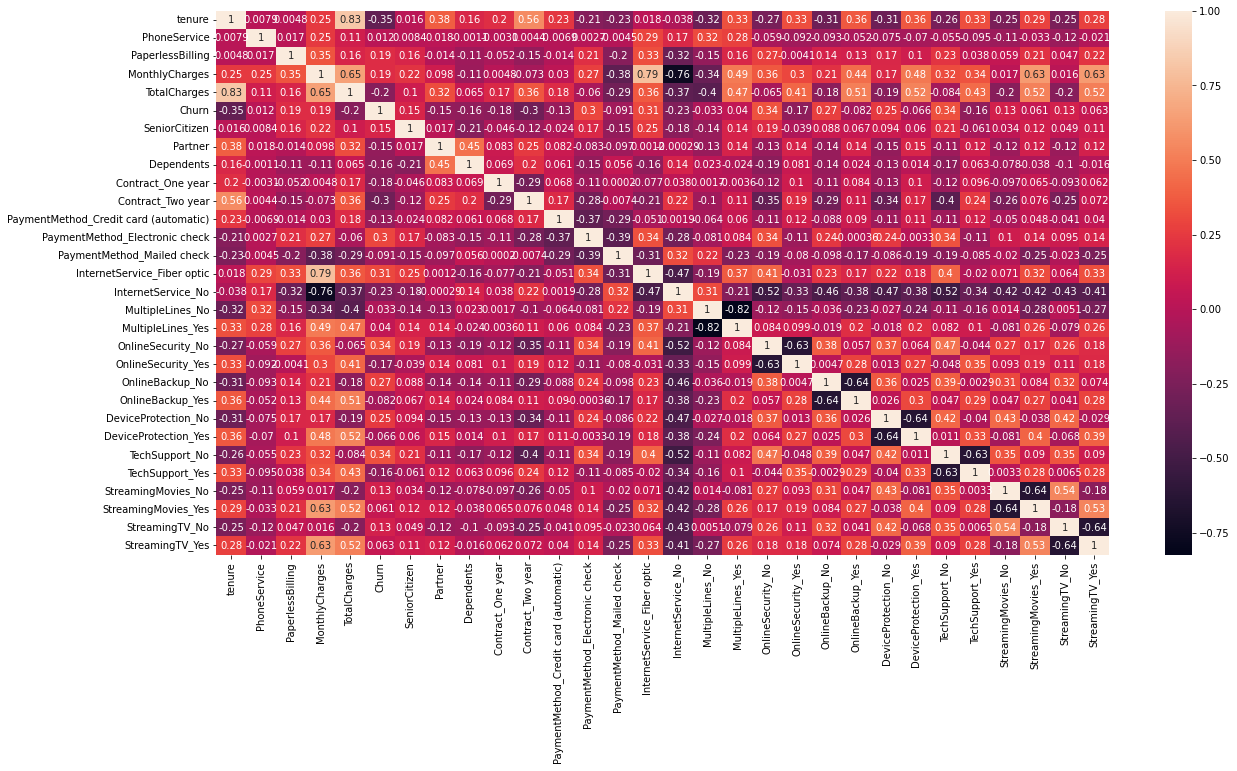

In [49]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(), annot=True)
plt.show()

In [50]:
telecom.columns

Index(['customerID', 'tenure', 'PhoneService', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner',
       'Dependents', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_Fiber optic', 'InternetService_No', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes', 'StreamingTV_No',
       'StreamingTV_Yes'],
      dtype='object')

In [51]:
# Dropping highly correlated dummy variables
x_test=x_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'],1)
x_train=x_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No'],1)

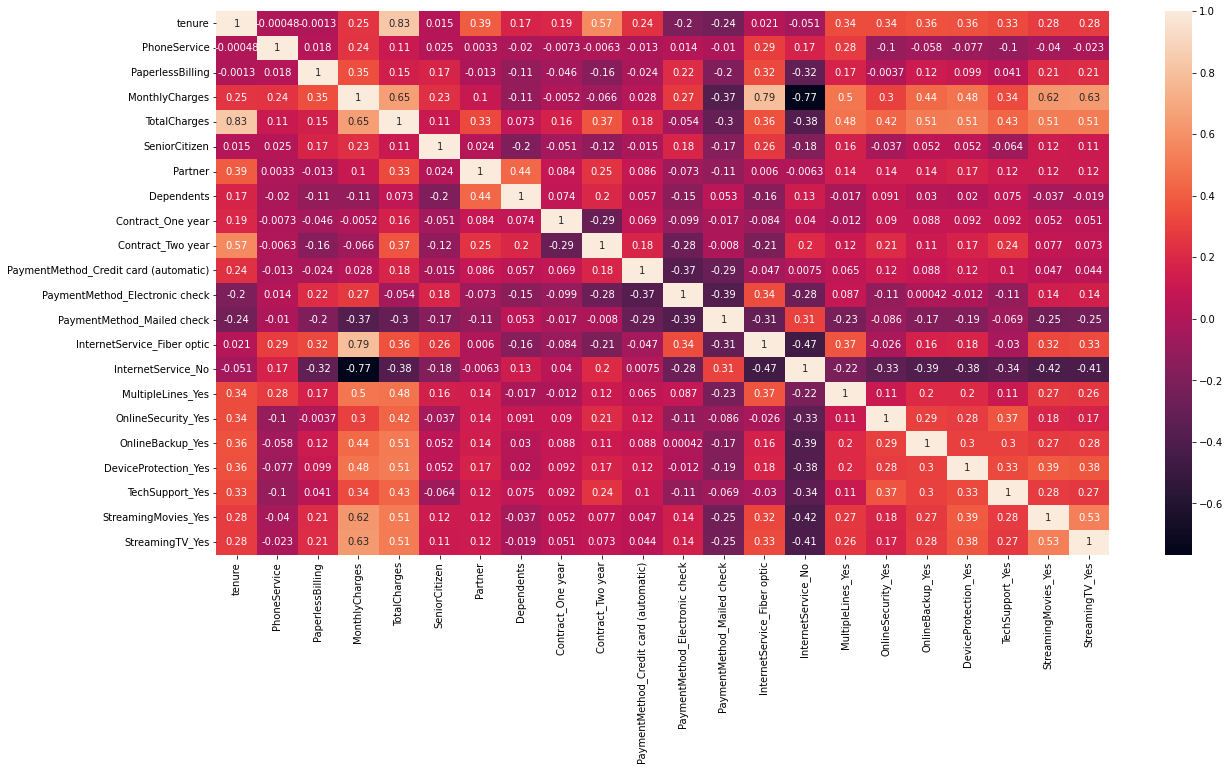

In [53]:
# checking the correlation values
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr(), annot=True)
plt.show()

** Step -7:GLM, Logistic Regression Model**

In [56]:
# logistic regression model, # GLM(Generalized linear Model)
lm1=sm.GLM(y_train,(sm.add_constant(x_train)), family=sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.8
Date:                Tue, 28 Mar 2023   Deviance:                       4009.6
Time:                        10:25:50   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9598      1.545     -2.563      0.010      -6.988      -0.931
tenure                                   -1.5174      0.189     -8.017      0.000      -1.888      -1.146
PhoneService                              0.9519      0.789      1.207      0.227      -0.594       2.498
PaperlessBilling                          0.3258      0.090      3.618      0.000       0.149       0.502
MonthlyCharges                           -2.1835      1.160     -1.883      0.060      -4.456       0.089
TotalCharges                              0.7325      0.198      3.702      0.000       0.345       1.120
SeniorCitizen                             0.3987      0.102      3.927      0.000       0.200       0.598
Partner                                   0.0372      0.094      0.397      0.691      -0.146       0.221
Dependents                               -0.1428      0.107     -1.331      0.183      -0.353       0.068
Contract_One year                        -0.6575      0.129     -5.104      0.000      -0.910      -0.405
Contract_Two year                        -1.2456      0.212     -5.875      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2582      0.137     -1.887      0.059      -0.526       0.010
PaymentMethod_Electronic check            0.1608      0.113      1.428      0.153      -0.060       0.381
PaymentMethod_Mailed check               -0.2549      0.137     -1.855      0.064      -0.524       0.014
InternetService_Fiber optic               2.5162      0.967      2.603      0.009       0.622       4.411
InternetService_No                       -2.7808      0.981     -2.833      0.005      -4.704      -0.857
MultipleLines_Yes                         0.5624      0.214      2.629      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0224      0.216     -0.104      0.917      -0.446       0.401
OnlineBackup_Yes                          0.1754      0.212      0.829      0.407      -0.239       0.590
DeviceProtection_Yes                      0.3230      0.215      1.502      0.133      -0.098       0.744
TechSupport_Yes                          -0.0299      0.216     -0.138      0.890      -0.454       0.394
StreamingMovies_Yes                       0.8496      0.396      2.146      0.032       0.074       1.625
StreamingTV_Yes                           0.9609      0.396      2.426      0.015       0.185       1.737
=========================================================================================================
"""

**Step-8: Feature selection using RFE**





In [58]:
from sklearn.linear_model import LogisticRegression


In [60]:
logreg=LogisticRegression()

In [62]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)  # running rfe to select 15 features
rfe.fit(x_train, y_train)


RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [63]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True,  True,  True,  True, False, False,
       False,  True,  True,  True])

In [64]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 8),
 ('TechSupport_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1),
 ('StreamingTV_Yes', True, 1)]

In [65]:
col=x_train.columns[rfe.support_]

In [66]:
x_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Electronic check', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

In [67]:
x_train_sm=sm.add_constant(x_train[col])
logm2=sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Tue, 28 Mar 2023   Deviance:                       4022.2
Time:                        10:58:25   Pearson chi2:                 6.25e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2825
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
=========================================================================================================
"""

In [69]:
#getting the predicted values on the train set
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [71]:
# creating a dataframe with actual churn flag and predicted possibilities
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
879,0,0.192642,879
5790,0,0.275624,5790
6498,1,0.599507,6498
880,1,0.513571,880
2784,1,0.648233,2784


In [73]:
# creating a new column 'predicted' with 1 if churn is > 0.5 else 0
y_train_pred_final['Predicted']=y_train_pred_final.Churn_Prob.map(lambda x: 1 if x >0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,Predicted
879,0,0.192642,879,0
5790,0,0.275624,5790,0
6498,1,0.599507,6498,1
880,1,0.513571,880,1
2784,1,0.648233,2784,1


In [74]:
from sklearn import metrics

In [80]:
# Confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Predicted)
confusion

array([[3275,  360],
       [ 574,  713]])

In [81]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.Predicted))

0.8102397399431126
